In [1]:
import torch
from botorch.models.gp_regression import SingleTaskGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.priors import GammaPrior
from botorch.models.transforms import Normalize, Standardize

train_x = torch.tensor([[0.000000],
                        [0.100000],
                        [-1.000000],
                        [-0.392787],
                        [0.297180],
                        [0.759159],
                        [-0.223823],
                        [0.394187],
                        [-0.450012],
                        [-0.115379],
                        [0.200063],
                        [0.436399] ])

rms_beam_size = torch.tensor([[0.000000],
                       [0.100000],
                       [1.000000],
                       [0.392787],
                       [0.297180],
                       [0.759159],
                       [0.223823],
                       [0.394187],
                       [0.450012],
                       [0.115379],
                       [0.200063],
                       [0.436399] ])

train_y = rms_beam_size.pow(2)
noise_prior = GammaPrior(1., 10.)
likelihood = GaussianLikelihood(noise_prior=noise_prior)
input_transform = Normalize(1)
outcome_transform = Standardize(1)
model = SingleTaskGP(train_x, 
                     train_y, 
                     input_transform=input_transform,
                     outcome_transform=outcome_transform, 
                     likelihood=likelihood)

C:\Users\Dylan\anaconda3\envs\xopt-dev\lib\site-packages\botorch\models\gpytorch.py:119: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  warnings.warn(


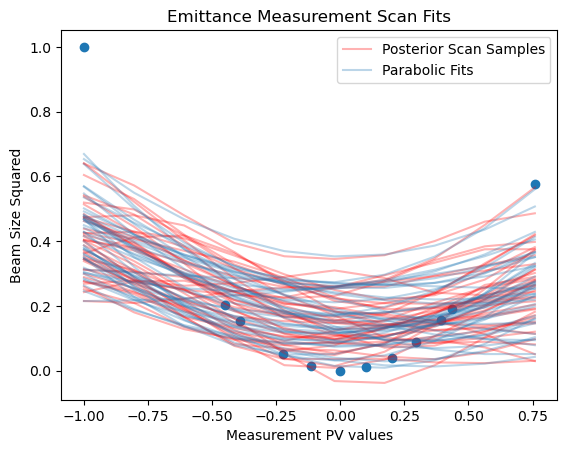

In [6]:
from utils import get_valid_emittance_samples

beam_energy = 0.135
q_len=0.108
distance = 2.26

(emits_at_target_valid, 
 emits_sq_at_target, 
 is_valid, 
 sample_validity_rate) = get_valid_emittance_samples(model, beam_energy, q_len, distance, n_samples=50, n_steps_quad_scan=10, visualize=True)


Text(0, 0.5, 'Probability Density')

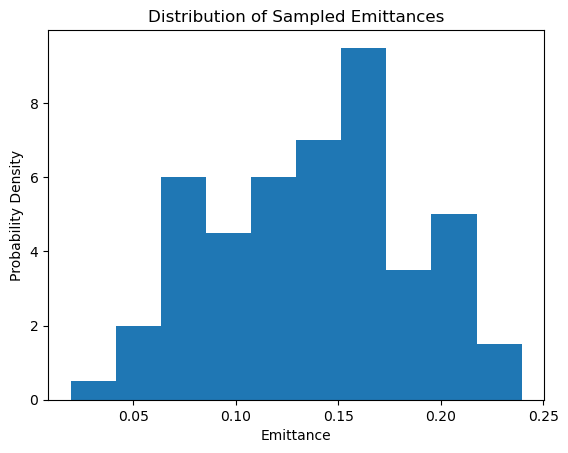

In [4]:
from matplotlib import pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.hist(emits_at_target_valid.flatten(), density=True)
plt.title('Distribution of Sampled Emittances')
plt.xlabel('Emittance')
plt.ylabel('Probability Density')